In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
data = Path('/Users/jarl/2d-discharge-nn/data/interpolation_datasets/rec-interpolation2.nc')

Import xarray data and extract a single "image"

In [3]:
ds = xr.open_dataset(data)
ds['potential (V)'].sel(V=300,P=5)

<xarray.DataArray 'potential (V)' (y: 707, x: 200)>
[141400 values with dtype=float64]
Coordinates:
  * y        (y) float64 0.0 0.001 0.002 0.003 0.004 ... 0.703 0.704 0.705 0.706
  * x        (x) float64 0.0 0.001 0.002 0.003 0.004 ... 0.196 0.197 0.198 0.199
    P        float64 5.0
    V        float64 300.0

In [4]:
ds

<xarray.Dataset>
Dimensions:        (y: 707, x: 200, P: 8, V: 4)
Coordinates:
  * y              (y) float64 0.0 0.001 0.002 0.003 ... 0.703 0.704 0.705 0.706
  * x              (x) float64 0.0 0.001 0.002 0.003 ... 0.196 0.197 0.198 0.199
  * P              (P) float64 5.0 10.0 30.0 45.0 60.0 80.0 100.0 120.0
  * V              (V) float64 200.0 300.0 400.0 500.0
Data variables:
    potential (V)  (V, P, y, x) float64 ...
    Ne (#/m^-3)    (V, P, y, x) float64 ...
    Ar+ (#/m^-3)   (V, P, y, x) float64 ...
    Nm (#/m^-3)    (V, P, y, x) float64 ...
    Te (eV)        (V, P, y, x) float64 ...

In [5]:
ds['potential (V)']

<xarray.DataArray 'potential (V)' (V: 4, P: 8, y: 707, x: 200)>
[4524800 values with dtype=float64]
Coordinates:
  * y        (y) float64 0.0 0.001 0.002 0.003 0.004 ... 0.703 0.704 0.705 0.706
  * x        (x) float64 0.0 0.001 0.002 0.003 0.004 ... 0.196 0.197 0.198 0.199
  * P        (P) float64 5.0 10.0 30.0 45.0 60.0 80.0 100.0 120.0
  * V        (V) float64 200.0 300.0 400.0 500.0

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jarl/Documents/阪大/research/ICDDPS-4/poster/grid.png'

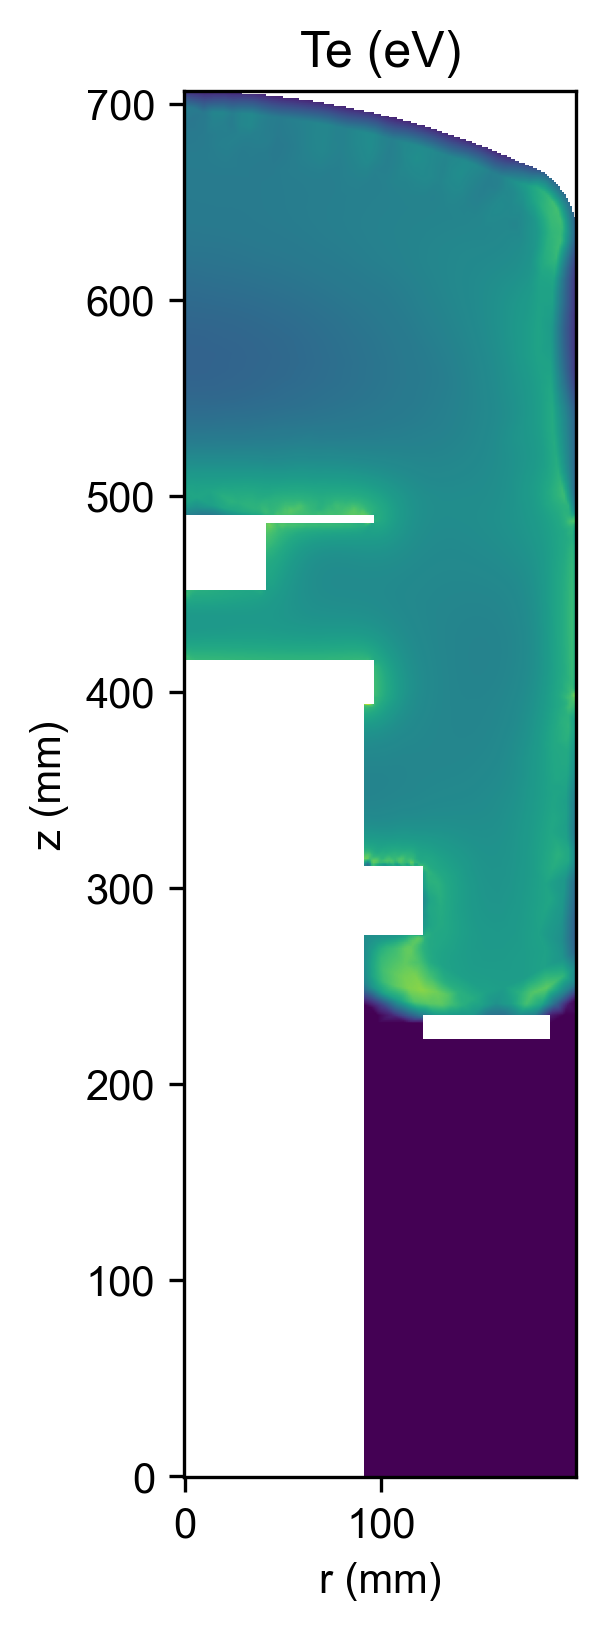

In [6]:
fig, ax = plt.subplots(dpi=300, figsize=(12, 6))
ax.imshow(ds['Te (eV)'].sel(V=300,P=45), cmap='viridis', origin='lower')
ax.set_aspect('equal')
ax.set_title('Te (eV)')
ax.set_ylabel('z (mm)')
ax.set_xlabel('r (mm)')
fig.savefig('/Users/jarl/Documents/阪大/research/ICDDPS-4/poster/grid.png', bbox_inches='tight')

In [8]:
avg_data= Path('/Users/jarl/2d-discharge-nn/data/avg_data.feather')
mesh_df = pd.read_feather(avg_data)

In [9]:
mesh_df.head()

,Vpp [V],P [Pa],X,Y,potential (V),Ne (#/m^-3),Ar+ (#/m^-3),Nm (#/m^-3),Te (eV)
0,200,5,0.182960,0.259570,54.1093,2.197450e+12,1.487970e+13,1.390060e+15,4.50207
1,200,5,0.172908,0.266347,70.7925,2.533790e+13,3.271110e+13,3.294800e+15,4.37958
2,200,5,0.173172,0.254322,58.4792,4.221430e+12,1.612710e+13,1.660740e+15,4.42511
3,200,5,0.176840,0.246447,39.4285,3.241290e+10,1.010190e+13,8.185030e+14,4.52327
4,200,5,0.170305,0.246504,44.2009,1.125090e+11,1.214620e+13,9.711210e+14,4.48925


In [10]:
dataset = mesh_df.loc[(mesh_df['Vpp [V]'] == 300) & (mesh_df['P [Pa]'] == 45)]

In [13]:
dataset[['X', 'Y', 'Nm (#/m^-3)']].head()

,X,Y,Nm (#/m^-3)
206536,0.182960,0.259570,1.172560e+15
206537,0.172908,0.266347,3.435790e+15
206538,0.173172,0.254322,1.283700e+15
206539,0.176840,0.246447,9.741250e+14
206540,0.170305,0.246504,9.785340e+14


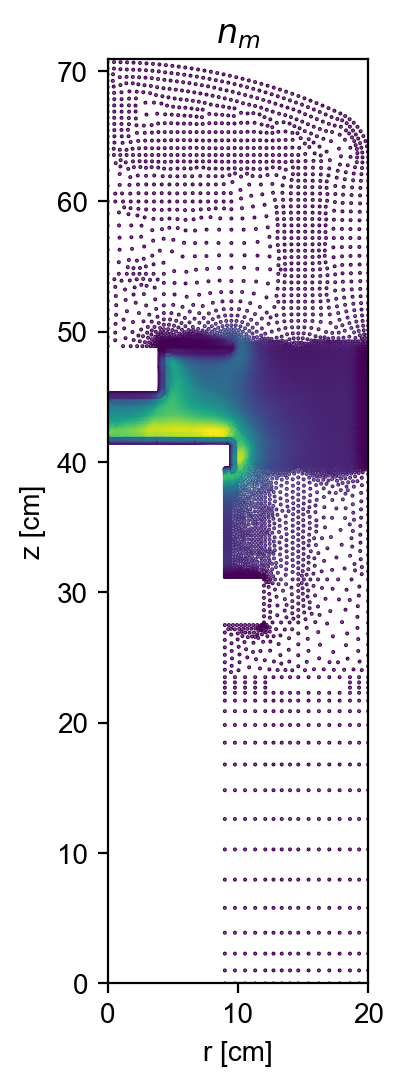

In [21]:
fig, ax = plt.subplots(dpi=200, figsize=(12, 6))
ax.scatter(dataset['X']*100, dataset['Y']*100, c=dataset['Nm (#/m^-3)'], cmap='viridis', s=0.2)
ax.set_aspect('equal')
ax.set_title('$n_m$')
ax.set_ylabel('z [cm]')
ax.set_xlabel('r [cm]')
ax.set_ylim(0, 70.9)
ax.set_xlim(0, 20)
fig.savefig('/Users/jarl/2d-discharge-nn/nm_mesh.png', bbox_inches='tight', dpi=300)

In [5]:
loss_data = Path('/Volumes/Salmon/research/2D_NN/created_models/2023-04-26_1557/losses.csv')
loss = pd.DataFrame(pd.read_csv(loss_data))

In [6]:
loss.head()

,Train loss,Neighbor loss
0,0.049533,0.000068
1,0.001619,0.000143
2,0.001482,0.000579
3,0.001557,0.000404
4,0.000816,0.000830


In [10]:
loss.describe()

,Train loss,Neighbor loss
count,50.000000,50.000000
mean,0.001634,0.000738
std,0.006930,0.000370
min,0.000161,0.000068
25%,0.000284,0.000427
50%,0.000455,0.000784
75%,0.000865,0.001020
max,0.049533,0.001464


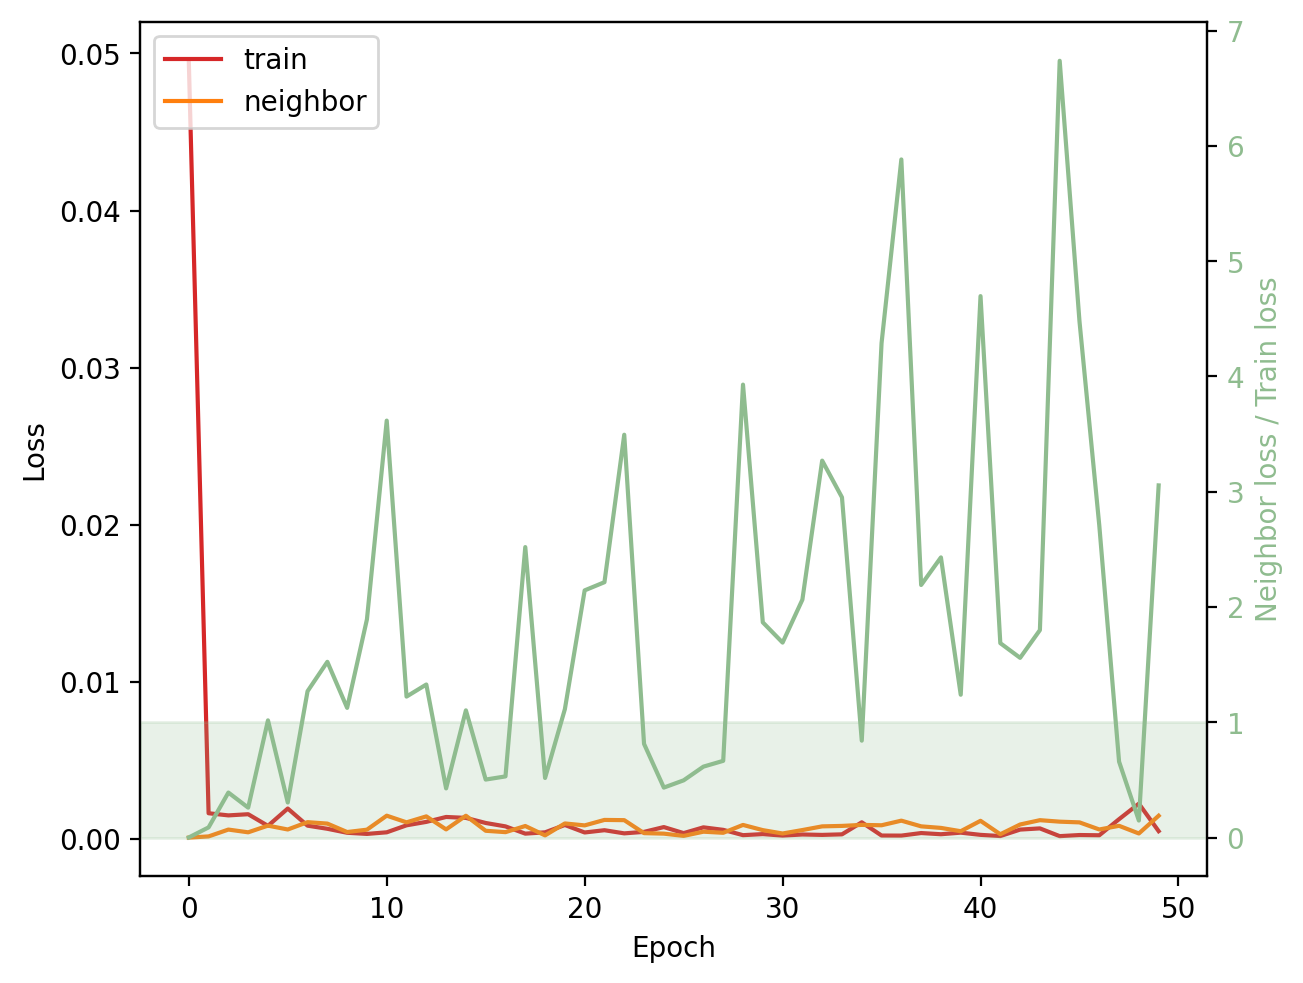

In [48]:
fig, ax = plt.subplots(layout='constrained', dpi=200)
ax.plot(loss['Train loss'], color='tab:red', label='train', )
ax.plot(loss['Neighbor loss'], color='tab:orange', label='neighbor')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')

ax1 = ax.twinx()
color = 'darkseagreen'
ax1.plot((loss['Neighbor loss']/loss['Train loss']), color=color)
ax1.set_ylabel('Neighbor loss / Train loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.axhspan(0, 1, color=color, alpha=0.2)

ax.legend(loc=2)

In [7]:
aug_ds = xr.open_dataset(data.parent/'synthetic'/'synthetic_averaged.nc')
aug_ds

<xarray.Dataset>
Dimensions:        (y: 707, image: 496, x: 200)
Coordinates:
  * y              (y) float64 0.0 0.001 0.002 0.003 ... 0.703 0.704 0.705 0.706
  * x              (x) float64 0.0 0.001 0.002 0.003 ... 0.196 0.197 0.198 0.199
Dimensions without coordinates: image
Data variables:
    potential (V)  (image, y, x) float64 ...
    Ne (#/m^-3)    (image, y, x) float64 ...
    Ar+ (#/m^-3)   (image, y, x) float64 ...
    Nm (#/m^-3)    (image, y, x) float64 ...
    Te (eV)        (image, y, x) float64 ...

In [2]:
# test xbatcher
import xbatcher

In [8]:
da = aug_ds['potential (V)']
da

<xarray.DataArray 'potential (V)' (image: 496, y: 707, x: 200)>
[70134400 values with dtype=float64]
Coordinates:
  * y        (y) float64 0.0 0.001 0.002 0.003 0.004 ... 0.703 0.704 0.705 0.706
  * x        (x) float64 0.0 0.001 0.002 0.003 0.004 ... 0.196 0.197 0.198 0.199
Dimensions without coordinates: image

### Test if the batch generator shuffles the data

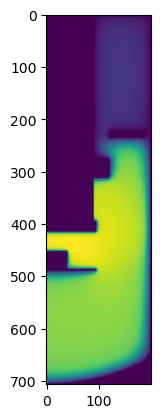

In [24]:
bgen = xbatcher.BatchGenerator(da, input_dims={'image': 5, 'x':200, 'y':707})
batch = bgen[1]
plt.imshow(batch.isel(image=0))

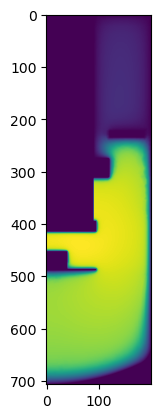

In [38]:
bgen1 = xbatcher.BatchGenerator(da, input_dims={'image': 32, 'x':200, 'y':707})
batch1 = bgen1[1]
plt.imshow(batch1.isel(image=0))

In [26]:
np.array_equal(batch1.values, batch.values)

True

In [32]:
batch1[0].values.shape

(707, 200)

In [29]:
list(aug_ds.keys())

['potential (V)', 'Ne (#/m^-3)', 'Ar+ (#/m^-3)', 'Nm (#/m^-3)', 'Te (eV)']

In [39]:
len(bgen1)

15

In [35]:
len(da)

496

In [37]:
100%99

1

In [48]:
import sys
print(str(sys.getsizeof(np.ndarray((32, 5, 707, 200))) / 1e6) + ' mb')

180.99216 mb
